###CLUSTERING: Comparación de Algoritmos

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, datasets

from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Genera las muestras
n_samples = 1000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=1)

# Generación de los clústeres para realizar las pruebas

<ipython-input-2-43e1c029ba15>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X= df_X.append(pd.DataFrame(X,columns=['x','y'])+0.5)
<ipython-input-2-43e1c029ba15>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X= df_X.append(0.5*pd.DataFrame(X,columns=['x','y']))


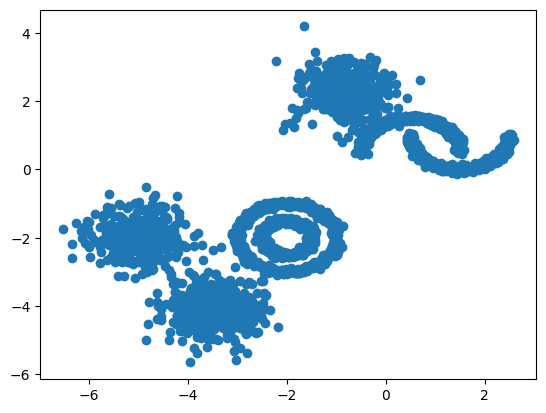

In [2]:
X,y = noisy_circles
df_X = pd.DataFrame(X,columns=['x','y'])-2
X,y =noisy_moons
df_X= df_X.append(pd.DataFrame(X,columns=['x','y'])+0.5) 
X,y =blobs
df_X= df_X.append(0.5*pd.DataFrame(X,columns=['x','y'])) 

plt.scatter(df_X.x,df_X.y)
plt.show()

## K-means

0.00012087821960449219


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


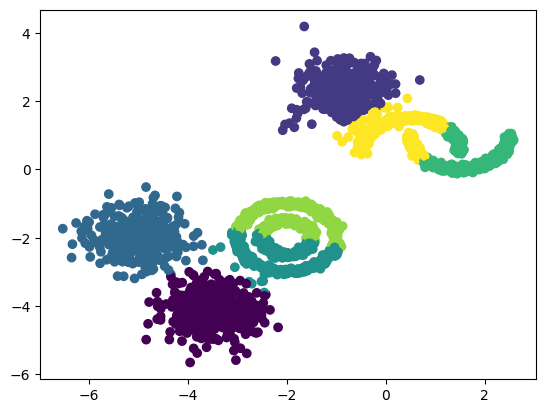

In [3]:
from sklearn.cluster import KMeans
# Aplicando KMeand con k=3 clústeres
t0 = time.time()
model = KMeans(7) 
t1 = time.time()
print(t1-t0)
# Ajusta el modelo a las muestras y clasifica
labels = model.fit_predict(df_X)
plt.scatter(df_X.x,df_X.y,c=labels)
plt.show()

## Jerárquico

0.5334923267364502


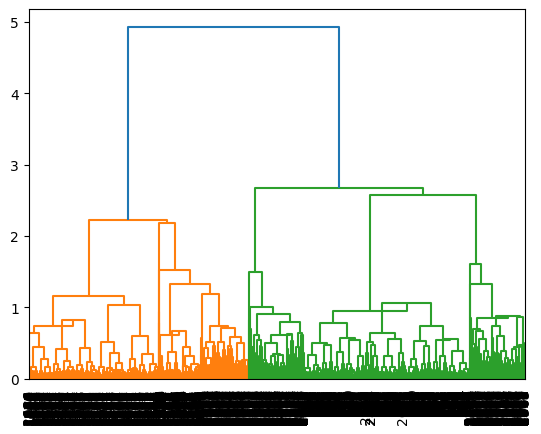

In [4]:
from scipy.cluster.hierarchy import linkage , dendrogram 
t0 = time.time()
mergings = linkage(df_X,method='centroid')
t1 = time.time()
print(t1-t0)
dendrogram(mergings,leaf_rotation=90,leaf_font_size=10)
plt.show()

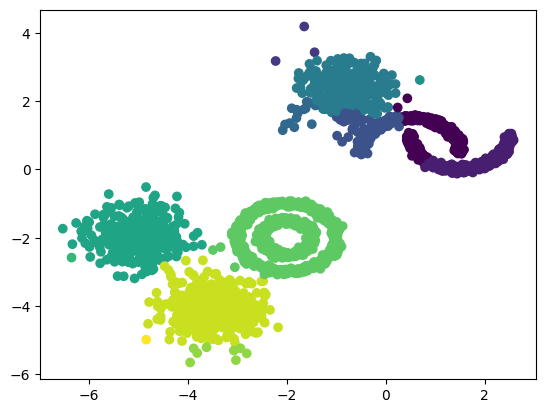

In [5]:
# Se extraen los clúster siguiendo el criterio de distancia
from scipy.cluster.hierarchy import fcluster
max_d = 1.1
clusters = fcluster(mergings, max_d, criterion='distance')
plt.scatter(df_X.x,df_X.y,c=clusters)
plt.show()

## DBScan

In [6]:
from sklearn.cluster import DBSCAN
t0 = time.time()
db = DBSCAN(eps=0.2, min_samples=10).fit(df_X)
t1 = time.time()
print(t1-t0)

cluster_labels = db.labels_

0.03586554527282715


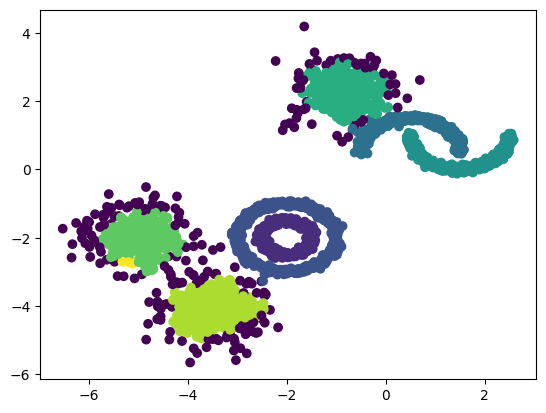

In [7]:
plt.scatter(df_X.x,df_X.y,c=cluster_labels)
plt.show()